# Market Basket Analysis

### Importing required libraries

In [25]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
449409,575117,23157,SET OF 6 NATIVITY MAGNETS,2,2011-11-08 14:22:00,2.08,12748.0,United Kingdom
112608,545897,22558,CLOTHES PEGS RETROSPOT PACK 24,1,2011-03-07 17:22:00,3.29,NaN,United Kingdom
140323,548400,22301,COFFEE MUG CAT + BIRD DESIGN,6,2011-03-30 17:33:00,2.55,17400.0,United Kingdom
352138,567671,22041,"RECORD FRAME 7"" SINGLE SIZE",1,2011-09-21 15:34:00,4.96,NaN,United Kingdom
293493,562602,23290,SPACEBOY CHILDRENS BOWL,8,2011-08-08 10:11:00,1.25,12865.0,Austria
484937,577545,22999,TRAVEL CARD WALLET VINTAGE LEAF,6,2011-11-20 14:43:00,0.42,16931.0,United Kingdom
116294,546236,22233,JIGSAW RABBIT AND BIRDHOUSE,12,2011-03-10 12:48:00,1.65,12370.0,Cyprus
278698,561217,22227,HANGING HEART MIRROR DECORATION,1,2011-07-25 17:09:00,1.25,NaN,United Kingdom
319571,564857,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,18,2011-08-31 09:23:00,4.13,NaN,United Kingdom
60628,541422,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,2,2011-01-17 17:48:00,0.83,NaN,United Kingdom


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
df.shape

(541909, 8)

### EDA

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.duplicated().sum()

5268

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['InvoiceNo'].duplicated().sum()

510741

In [10]:
df['Description'] = df['Description'].str.strip()

In [11]:
df['Description'].fillna('UNKNOWN', inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

Text(0, 0.5, 'Orders')

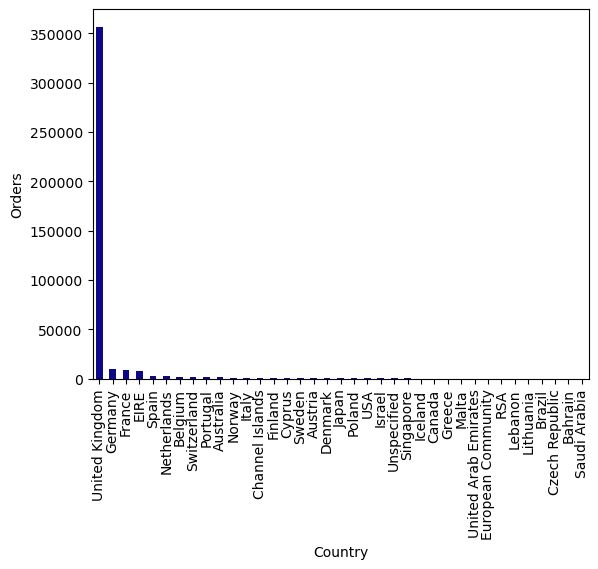

In [44]:
df['Country'].value_counts().plot(kind='bar', colormap='plasma')
plt.xlabel('Country')
plt.ylabel('Orders')

### Data Preprocessing

In [16]:
basket = (df[df['Country'] == 'France'].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C579562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C580161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def encode(x):
    if x > 0:
        return True
    if x <= 0:
        return False
    

encoded_basket = basket.applymap(encode)

C:\Users\asp99\AppData\Local\Temp\ipykernel_21180\1280540207.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_basket = basket.applymap(encode)


In [18]:
encoded_basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C579562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C580161,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Building model

In [19]:
apr = apriori(encoded_basket, min_support=0.03, use_colnames=True)

In [20]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(apr, metric='lift', min_threshold=1)

### Filtering out the best ones

In [22]:
# Filtering out recommendations with lift greater than 6 and confidence greater than 80%
filt_rules = rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]
filt_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.080786,0.082969,0.067686,0.837838,10.098151,0.060983,5.655022,0.980155
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.082969,0.080786,0.067686,0.815789,10.098151,0.060983,4.990019,0.982488
13,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED),0.037118,0.080786,0.030568,0.823529,10.193959,0.027569,5.208879,0.936670
64,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.061135,0.058952,0.054585,0.892857,15.145503,0.050981,8.783115,0.994791
65,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.058952,0.061135,0.054585,0.925926,15.145503,0.050981,12.674672,0.992483
...,...,...,...,...,...,...,...,...,...,...
1286,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.072052,0.117904,0.069869,0.969697,8.224467,0.061374,29.109170,0.946618
1288,"(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE, ...",(SET/6 RED SPOTTY PAPER PLATES),0.072052,0.109170,0.069869,0.969697,8.882424,0.062003,29.397380,0.956324
1289,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.087336,0.113537,0.069869,0.800000,7.046154,0.059953,4.432314,0.940191
1290,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...","(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",0.087336,0.100437,0.069869,0.800000,7.965217,0.061097,4.497817,0.958134
